# DATA MODELLING EXERCISE

# Principal Component Analysis from scratch

## Imports

In [2]:
# Imports

import numpy as np
import pandas as pd 

## Dataset load

In [3]:
# Iris Data Set

df = pd.read_csv('../Data/iris.csv')

df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


## Mean Centering

In [7]:
# Mean centering

df_meaned = df[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']].apply(lambda x: x - x.mean())

df_meaned.head()


,sepal.length,sepal.width,petal.length,petal.width
0,-0.743333,0.442667,-2.358,-0.999333
1,-0.943333,-0.057333,-2.358,-0.999333
2,-1.143333,0.142667,-2.458,-0.999333
3,-1.243333,0.042667,-2.258,-0.999333
4,-0.843333,0.542667,-2.358,-0.999333


## Covariance Matrix Calculation

In [8]:
# Covariance Matrix

cov_mat = np.cov(df_meaned, rowvar=False)

## Eigen Values and Eigen Vectors calculation and sorting

In [9]:
#Calculating Eigenvalues and Eigenvectors of the covariance matrix
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

In [10]:
#sort the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1]
 
sorted_eigenvalue = eigen_values[sorted_index]
#similarly sort the eigenvectors 
sorted_eigenvectors = eigen_vectors[:,sorted_index]

## Select the number of components and reduce the dataset

In [11]:
# select the first n eigenvectors, n is desired dimension
# of our final reduced data.
 
n_components = 2 #you can select any number of components.
eigenvector_subset = sorted_eigenvectors[:,0:n_components]


In [13]:
#Transform the data 
df_reduced = np.dot(eigenvector_subset.transpose(),df_meaned.transpose()).transpose()


## Defining a PCA function

In [15]:
def PCA(X , num_components):
     
    #Mean centering
    X_meaned = X - np.mean(X , axis = 0)
     
    #Covariance Matrix
    cov_mat = np.cov(X_meaned , rowvar = False)
     
    #Calculating Eigenvalues and Eigenvectors of the covariance matrix
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    #sort the eigenvalues in descending order
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    # select the first n eigenvectors, n is desired dimension
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    #Transform the data
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced

## Reducing the Iris Dataset - 2 PCs

In [16]:
#prepare the data
x = df.iloc[:,0:4]
 
#prepare the target
target = df.iloc[:,4]
 
#Applying it to PCA function
mat_reduced = PCA(x , 2)
 
#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])
 
#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)

In [18]:
principal_df.head()

,PC1,PC2,variety
0,2.684126,0.319397,Setosa
1,2.714142,-0.177001,Setosa
2,2.888991,-0.144949,Setosa
3,2.745343,-0.318299,Setosa
4,2.728717,0.326755,Setosa


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

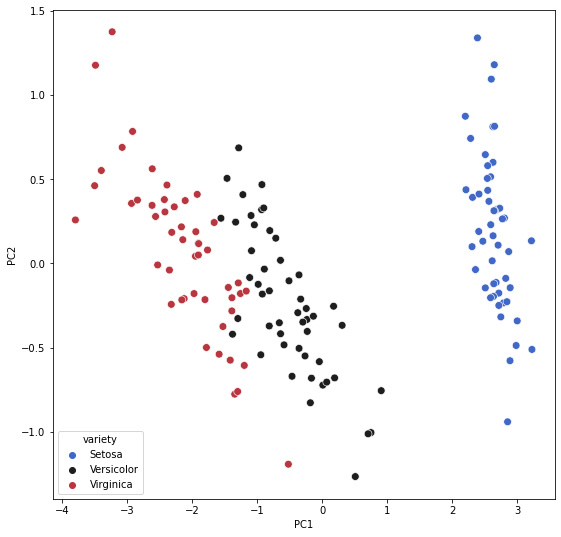

In [21]:
#Plotting the reduced data

import seaborn as sns
import matplotlib.pyplot as plt
 
plt.figure(figsize = (9,9))
sns.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'variety' , s = 60 , palette= 'icefire')


## Reducing the Iris Dataset - 3 PCs

In [22]:
#Applying it to PCA function
mat_reduced = PCA(x , 3)
 
#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2', 'PC3'])
 
#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)

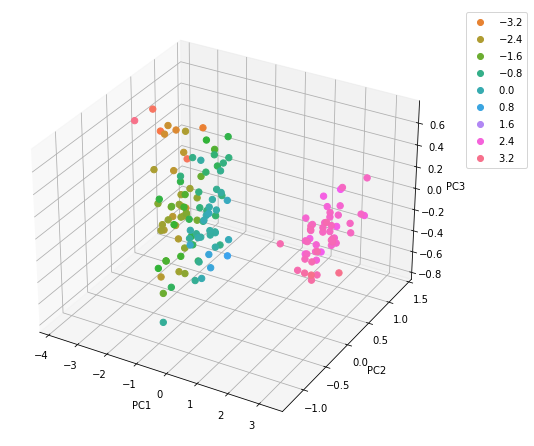

In [44]:
import re, seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap


x = principal_df['PC1'].astype(float)
y = principal_df['PC2'].astype(float)
z = principal_df['PC3'].astype(float)

# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(x, y, z, s=40, c=x, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

